<a href="https://colab.research.google.com/github/gauravmalakar08/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


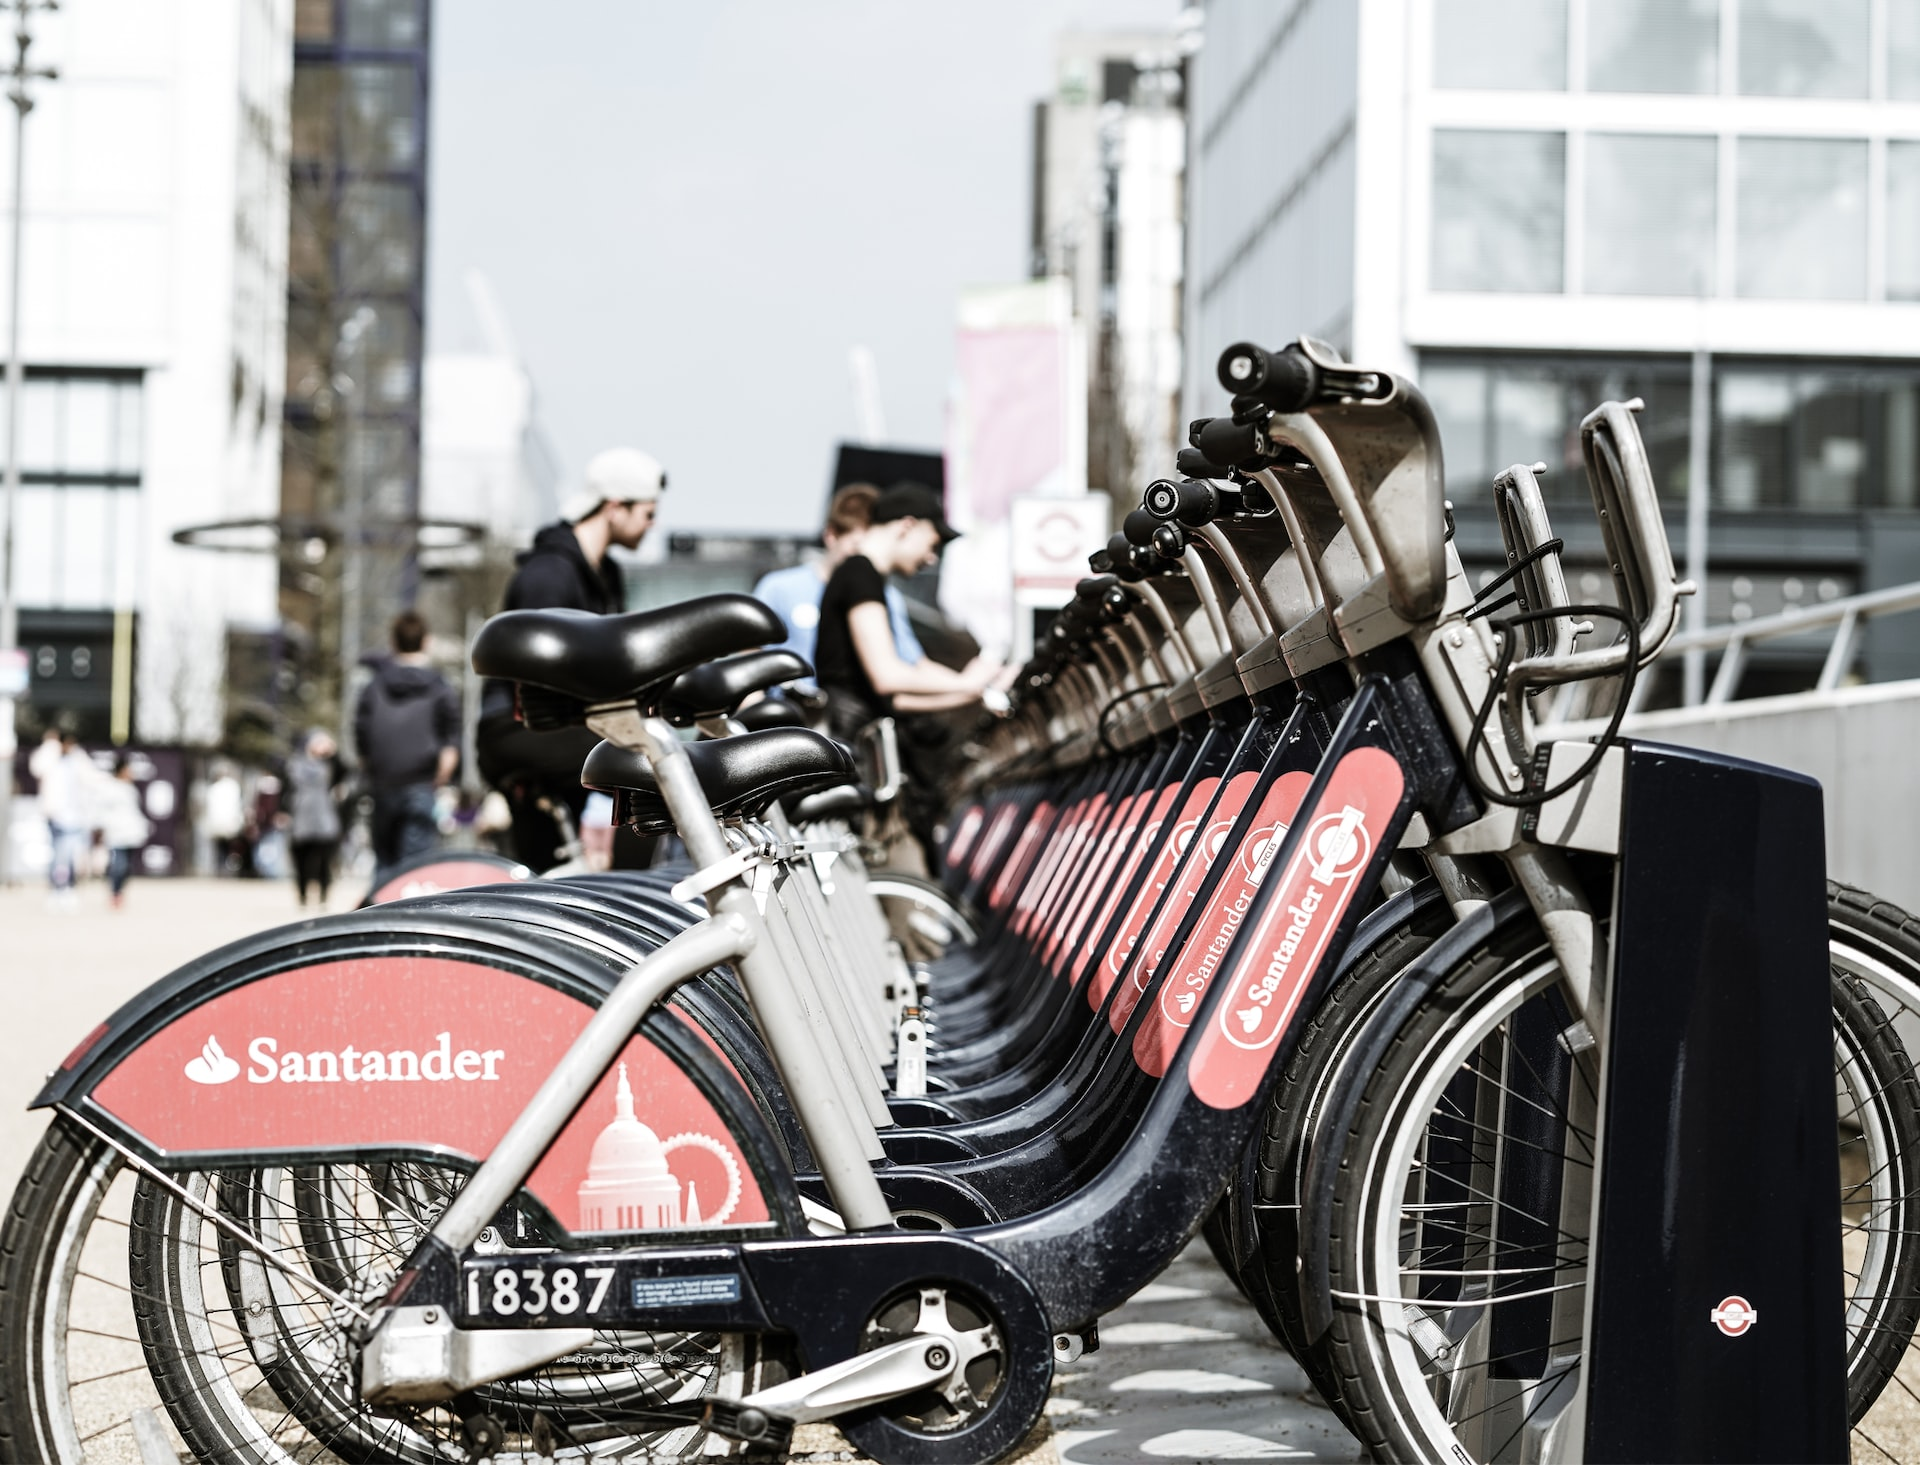

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature- Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from seaborn.rcmod import set_style
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset
df_orignal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', encoding= 'unicode_escape')


In [4]:
# Making a copy of dataset for safety purpose
df = df_orignal.copy()

In [5]:
df.shape

(8760, 14)

In [6]:
#read and describe the data set
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#Describing the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [9]:
#finding the null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# checking unique values 
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
# Checking Duplicate Values

print(len(df[df.duplicated()]))


0


#### **Obeservations**:
######We don't have any missing and duplicate values is the dataset.

##**Data Cleaning** 

In [12]:
# Renaming columns for convinence (Camel_Case)
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [13]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [14]:
# Changing date feature into three diffrent feature Day, Month, Year.

df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

# We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.

df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
df=df.drop(columns=['Date','day','year'],axis=1)



In [15]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [16]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [17]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

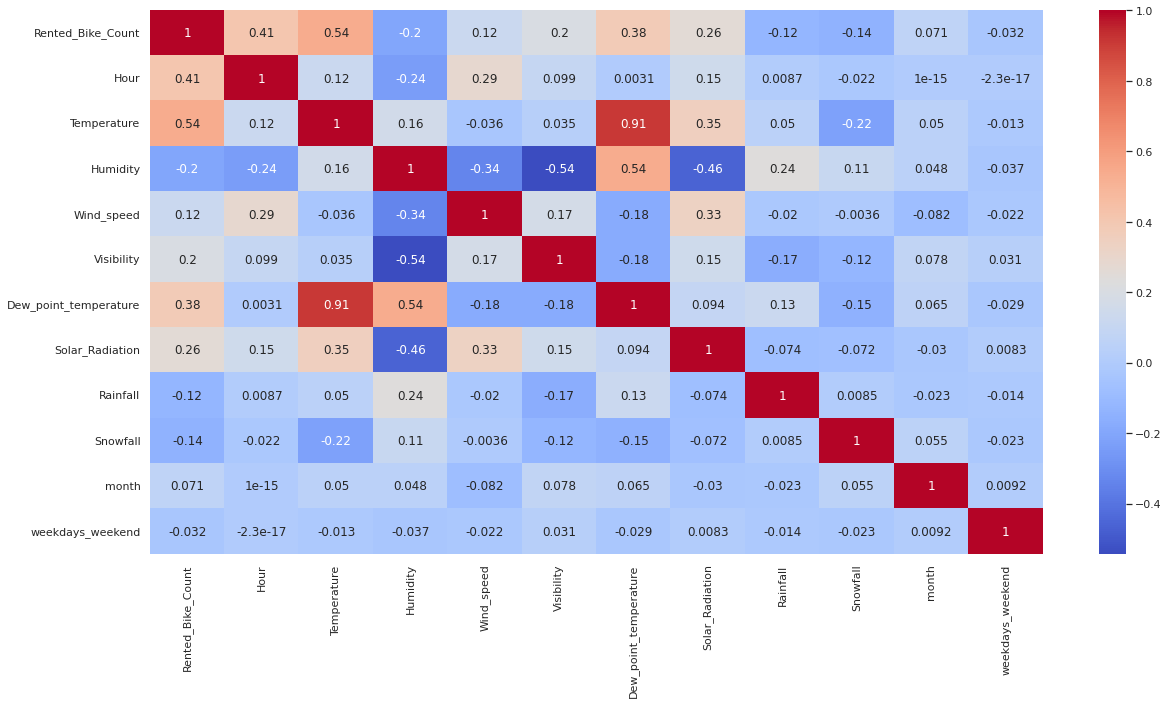

In [18]:
# constructing heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

### Obeservations:
###### Humidity has low correlation with visibility due to solar radiation.
##### Dew point temperature and temperature are highly related.

In [19]:
# Droping highly correlated features for eleminating Multico-linearity
df=df.drop(['Dew_point_temperature'],axis=1)

##**Exploratory Data Analysis**

###**Univariate Analysis :**

In [20]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


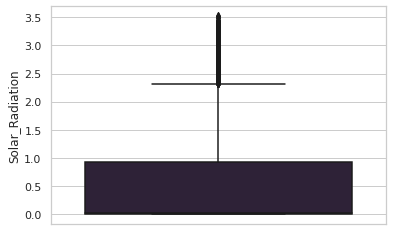

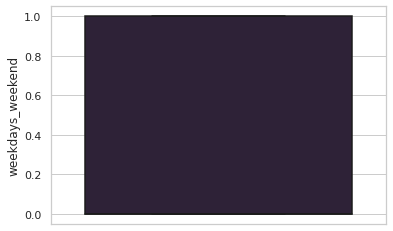

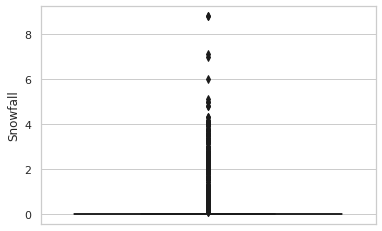

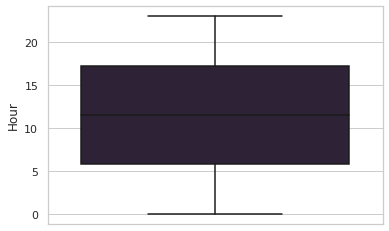

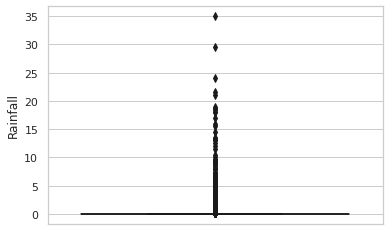

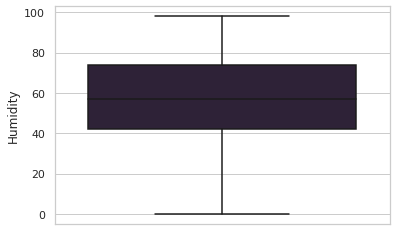

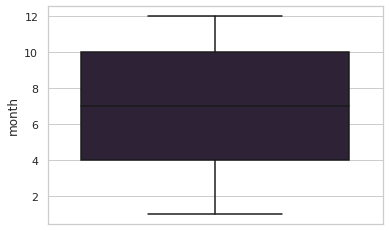

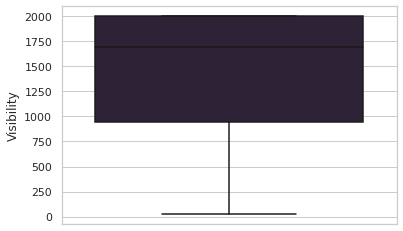

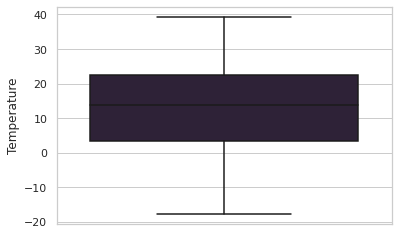

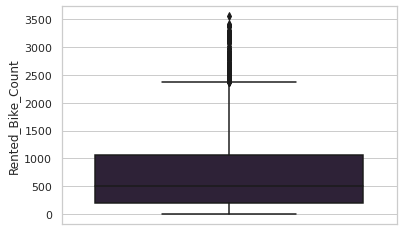

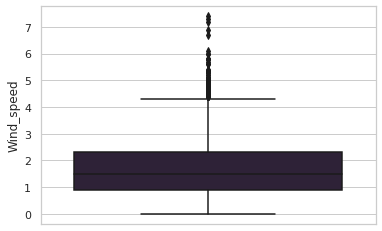

In [21]:
# Numerical features plotting

num_var = list(set(df.describe()))
for i in num_var:
    sns.boxplot(y = df[i])
    plt.show()

In [22]:
# cateogrical feature plotting

cat_var = list(set(df.describe(include = 'all')) - set(df.describe()))
cat_var

['Seasons', 'Holiday', 'Functioning_Day']

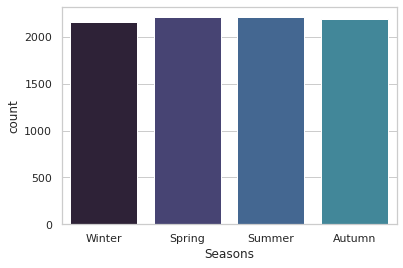

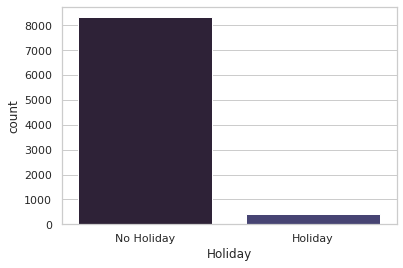

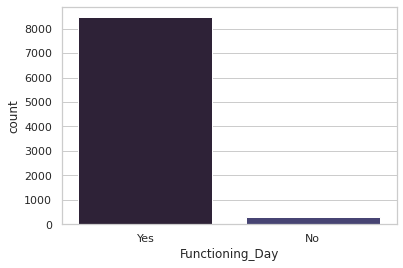

In [23]:
for i in cat_var:
    sns.countplot(x = df[i],)
    plt.show()

###**Bivariate Analysis :**

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

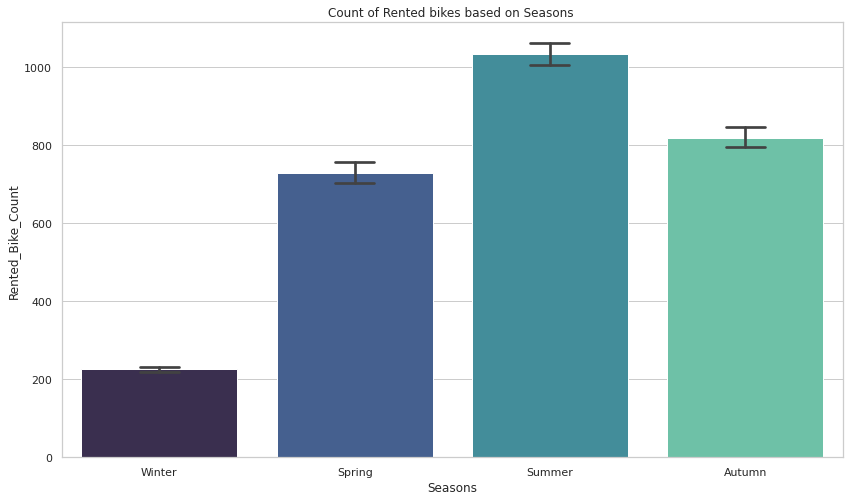

In [24]:
#analysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Seasons ')

#### Obeservations:


*  Maximum number of bike rentals in Summer season, while in winter season the bike rentend bike count is low.
*  This signifies that people enjoy bike riding in pleasant weather. 





[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

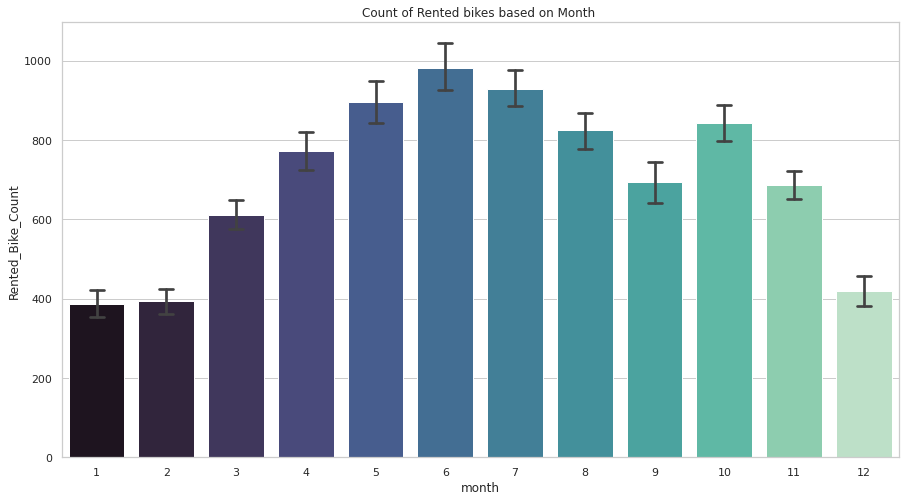

In [25]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')

####Observation:

* The demand of the rented bike is high between **5** to **10** months as compare to other months.





[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

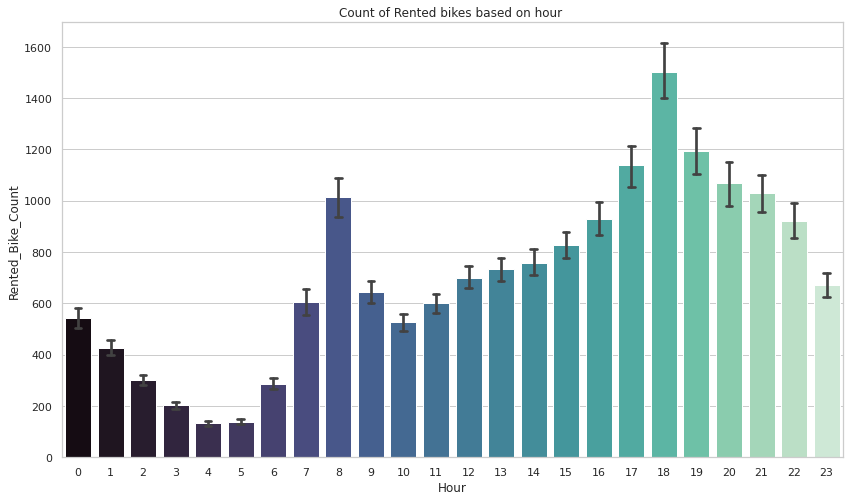

In [26]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

###Observation:


*   People generally use rented bikes during their working hour from 7am to 9am and 5pm to 8pm.

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

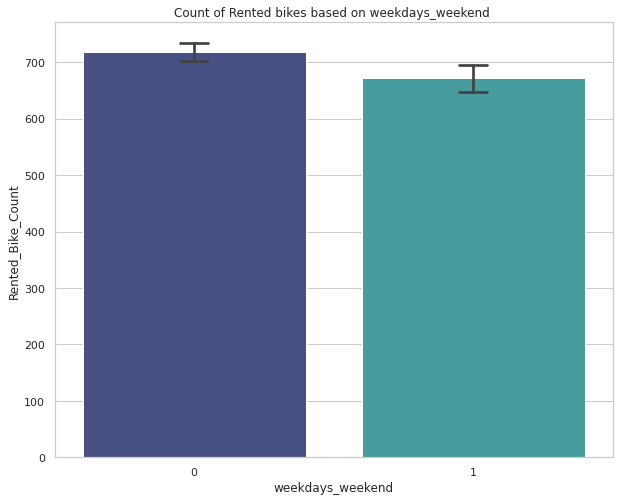

In [27]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

###Observation:


*   In the week days the demand of the bike is higher because of the office as compare to the weekend.



[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

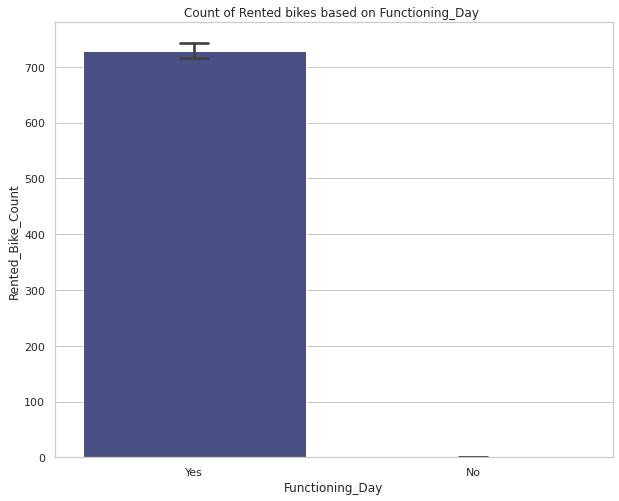

In [28]:
#anlysis of data by vizualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on Functioning_Day ')

###Observation:


*  People use rented bike only in functioning day



[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

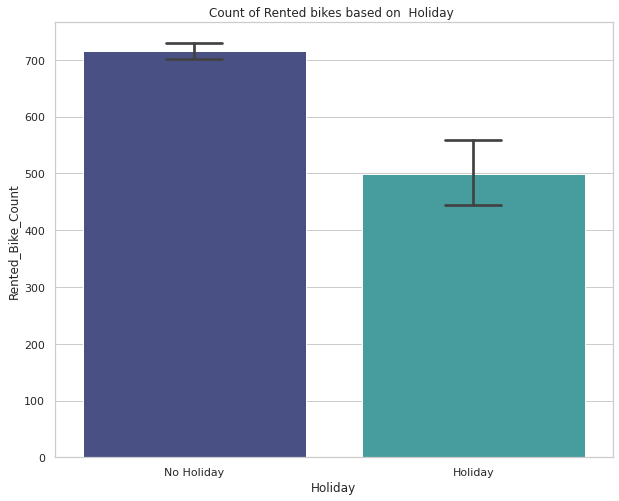

In [29]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

###Observation:


*  Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.



##**Visualizing The Distributions**

####**Visualizing numerical variables distplot :**

In [30]:
#assigning numerical coulmn to variable
num_feat= list(set(df.describe()))
num_feat

['Solar_Radiation',
 'weekdays_weekend',
 'Snowfall',
 'Hour',
 'Rainfall',
 'Humidity',
 'month',
 'Visibility',
 'Temperature',
 'Rented_Bike_Count',
 'Wind_speed']

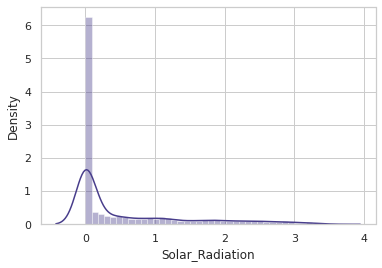

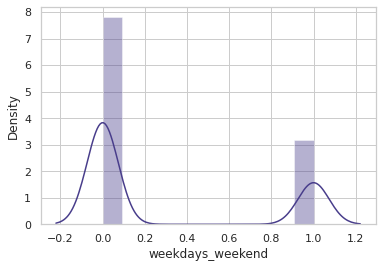

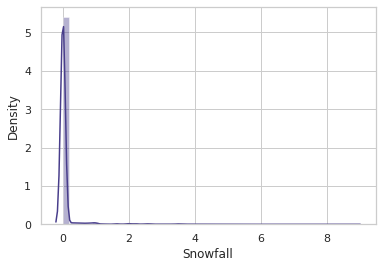

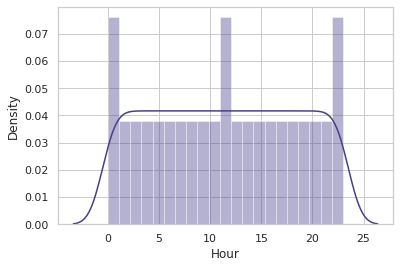

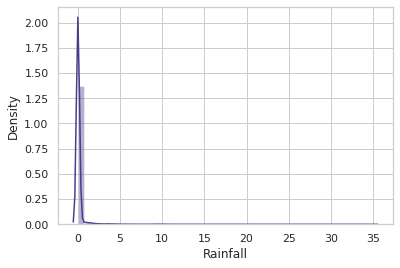

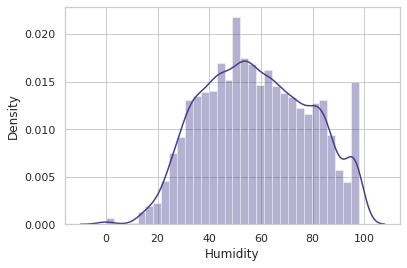

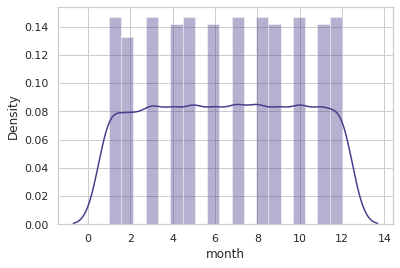

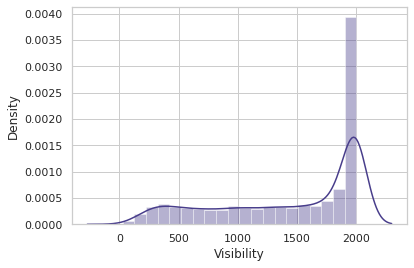

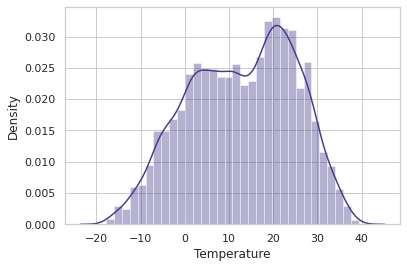

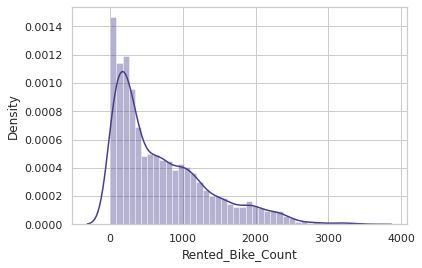

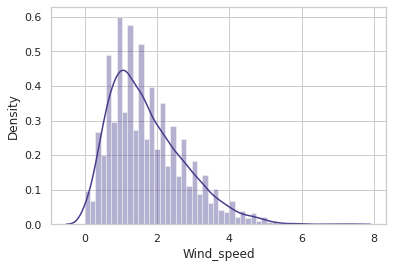

In [31]:
#plotting distplots to analyze the distribution of all numerical features
for col in num_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=df[col],color= 'darkslateblue')
  plt.xlabel(col)
plt.show()

###Observation:


*   Some of the distributions are rightly skewed while some are leftly skewed. 



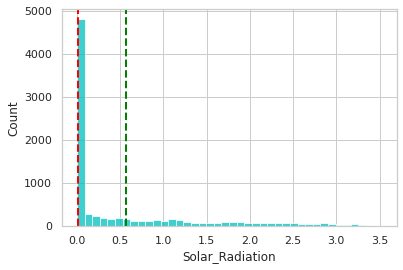

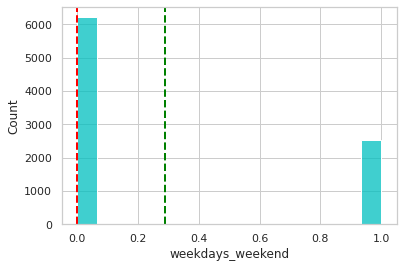

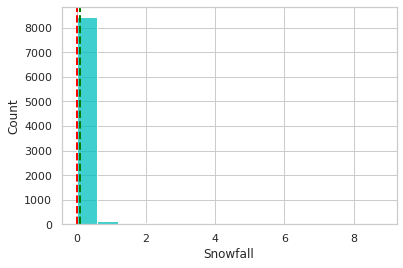

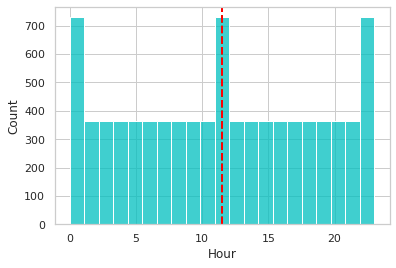

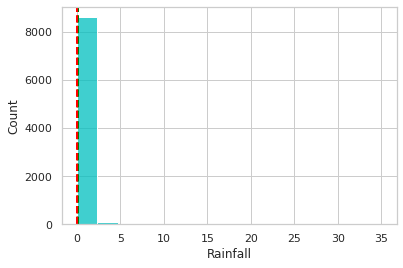

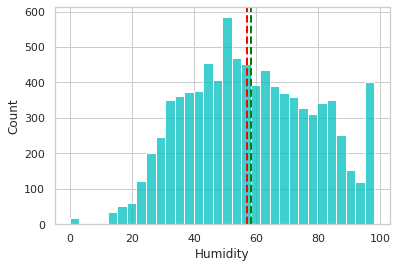

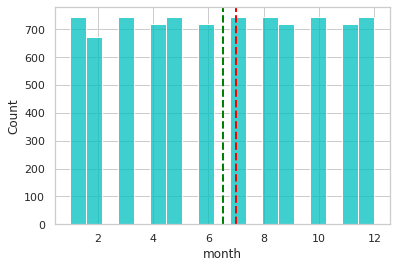

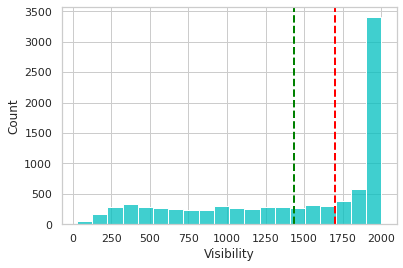

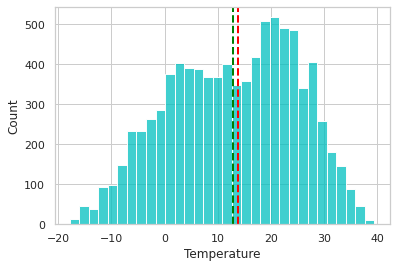

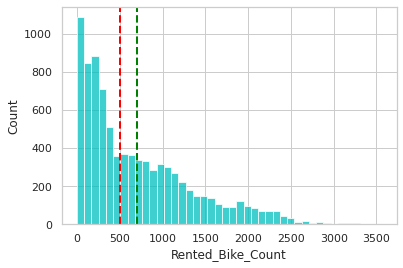

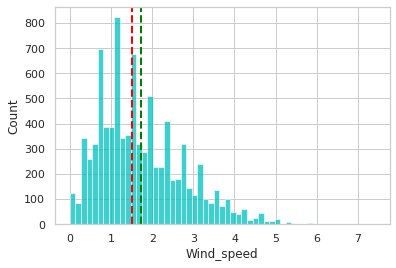

In [32]:
#plotting histogram with mean and median

for col in num_feat[:]:
  sns.histplot(df[col],color= 'c')
  plt.axvline(df[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

####Observation:


*  The features which are skewed, their mean and the median are also skewed.



##**Regression Plotting Of Features**

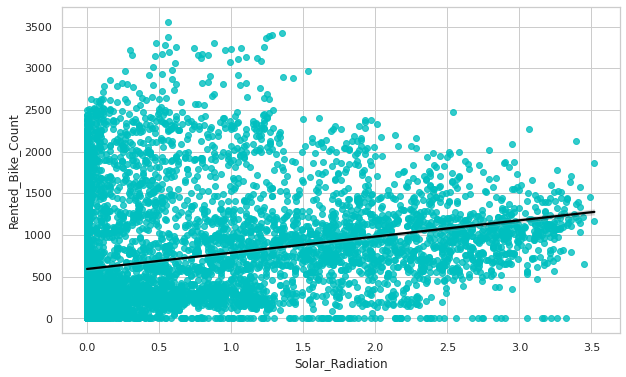

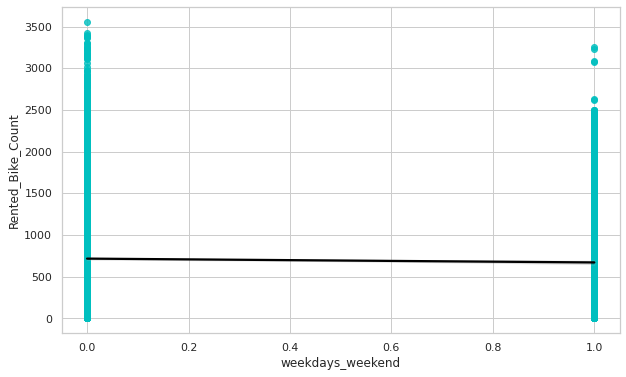

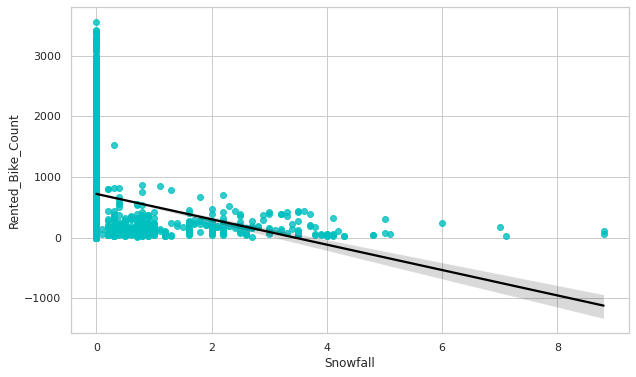

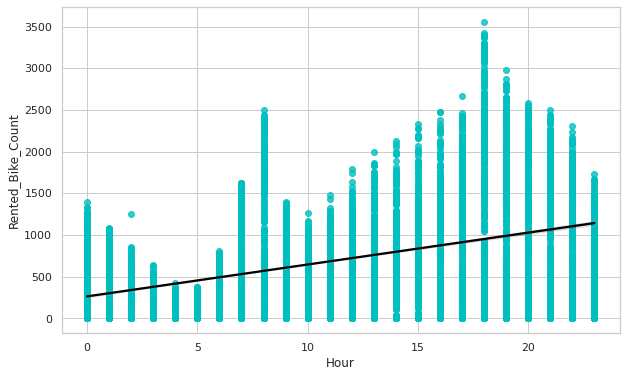

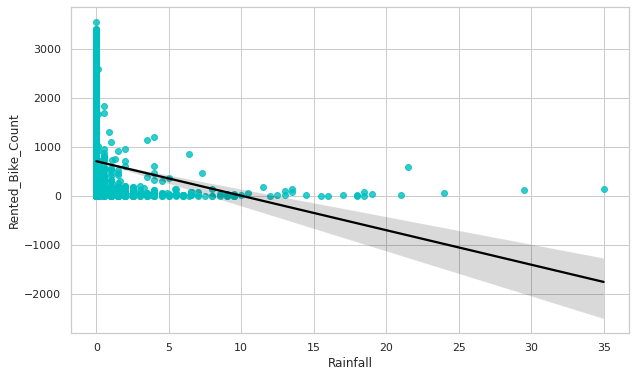

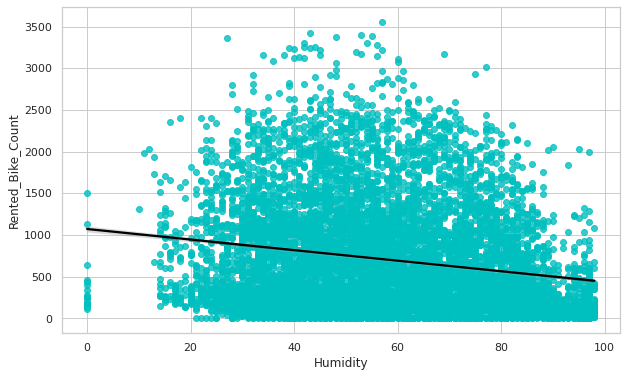

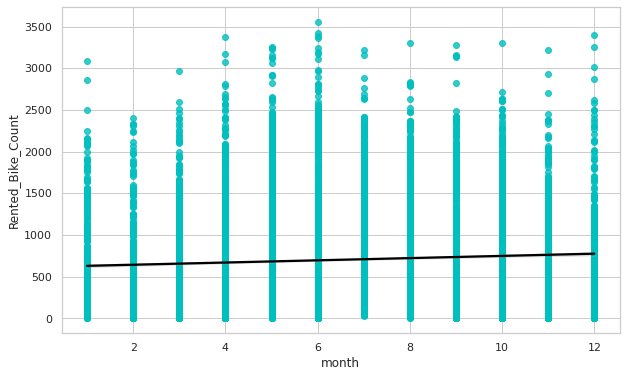

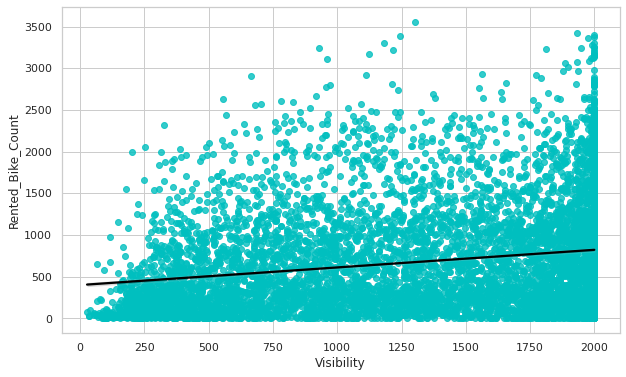

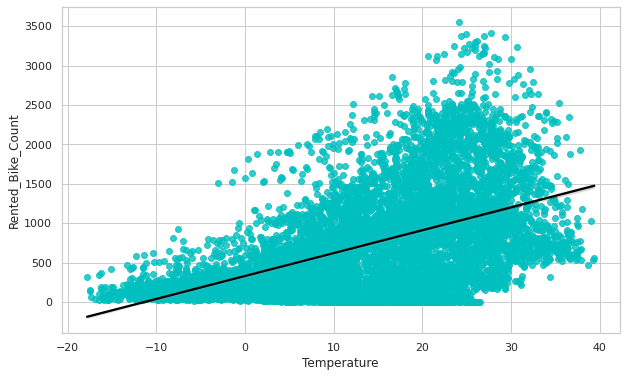

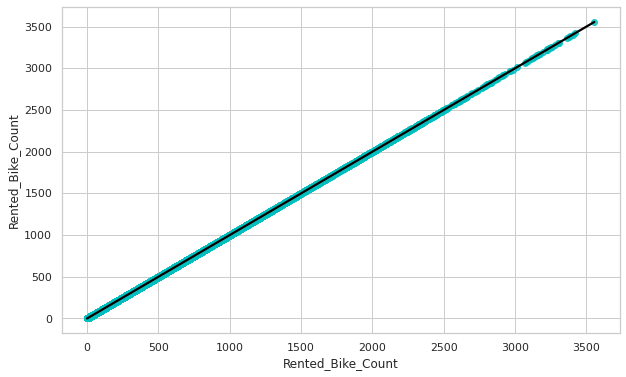

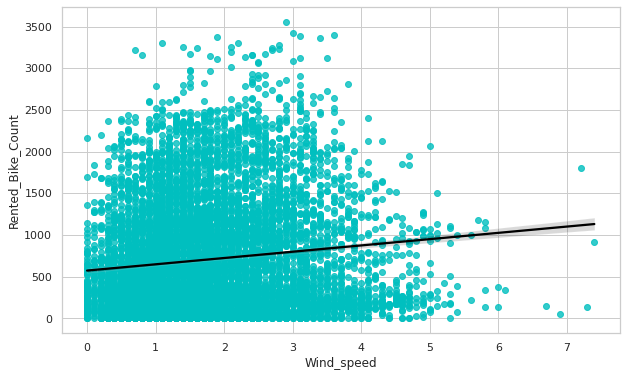

In [33]:
#plotting the regression plot for all the numerical features
for col in num_feat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

###Observations:


*  The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*  Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.



###**Normalising Rented_Bike_Count Column Data.**

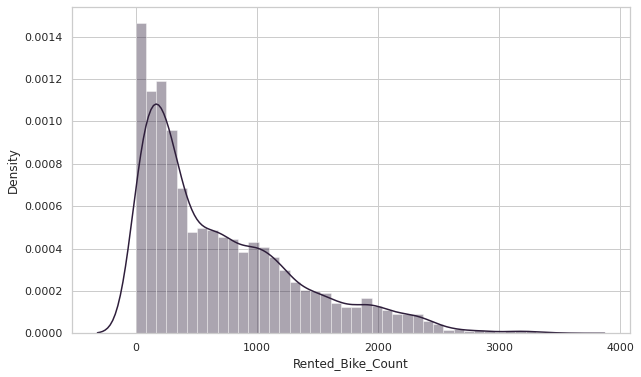

In [34]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(df['Rented_Bike_Count'])


####Observations:


*  Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.




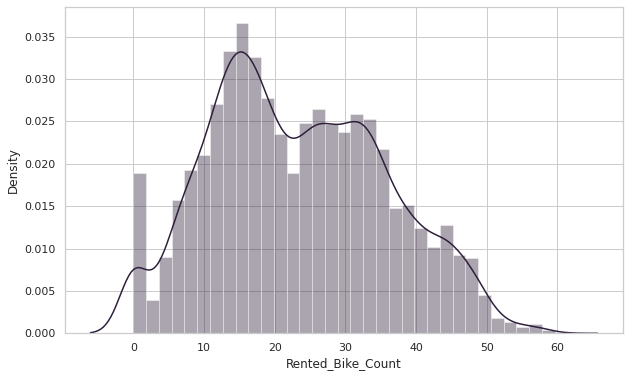

In [35]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df['Rented_Bike_Count']))

######After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.

###**Creating dummy variables and performing the one hot encoding to the dataset**

In [36]:
#Changing the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [38]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=True)
df1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

In [39]:
# Data spliting and value assigning to variables for Reggression

X = df1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(df1['Rented_Bike_Count'])

In [40]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

# **Implementing Linear Regression.**

In [42]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape


(6570, 47)


(2190, 47)

In [43]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [44]:
# Checking score
regg.score(X_train,y_train)

0.7557884266778845

In [45]:
#Checking Coefficent
regg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [46]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [47]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512172
R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


In [48]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [49]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.64474647323363
RMSE : 6.053490437196843
MAE : 4.658361507344821
R2 : 0.7680218977120631
Adjusted R2 : 0.762931808632916


In [50]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

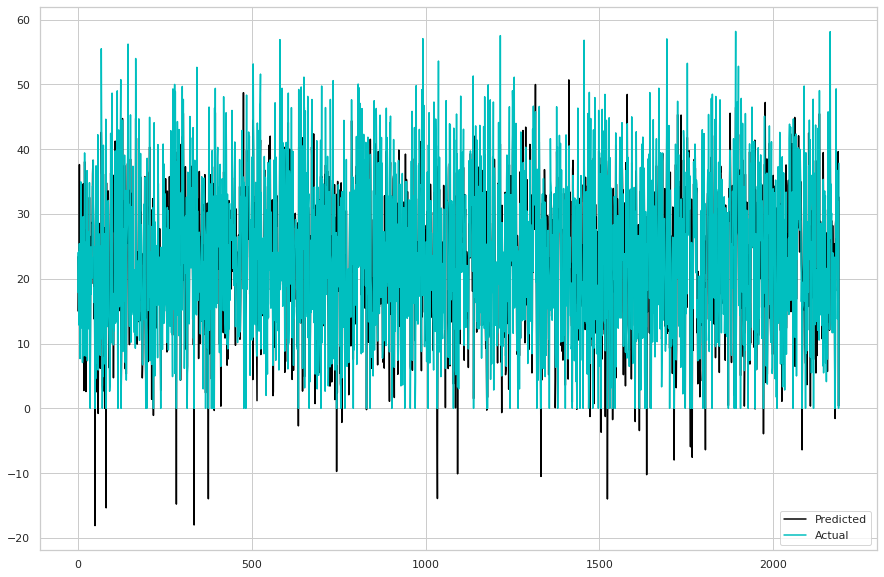

In [51]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

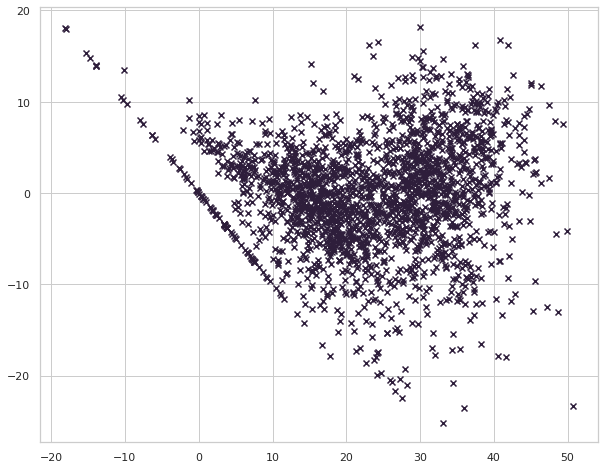

In [52]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

# **Implementing Ridge regression** (L2 Regularization)

In [53]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)


Ridge(alpha=0.1)

In [54]:
#checking score

ridge.score(X_train,y_train)

0.7557883433655243

In [55]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [56]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60631877572478
RMSE : 6.13239910440643
MAE : 4.658340946942368
R2 : 0.7557883433655243
Adjusted R2 : 0.7504298242890441


In [57]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [58]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


In [59]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

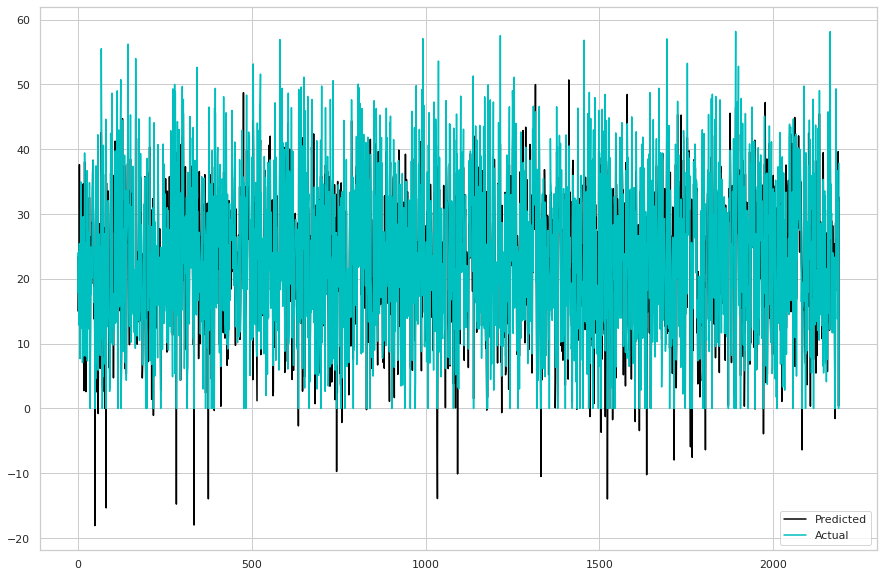

In [60]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

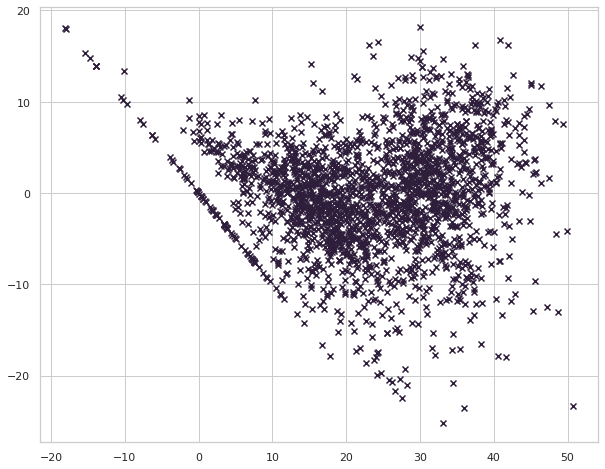

In [61]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

# **Implementing Lasso regression** (L1 Regularization)

In [62]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))


0.3873692800799008
0.40519624904934015


In [63]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [64]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


In [65]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [66]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


In [67]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

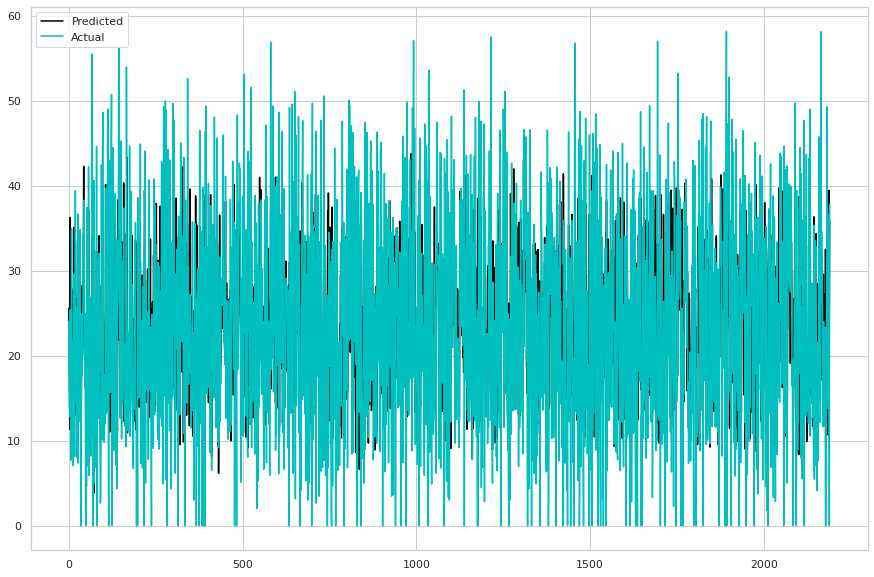

In [68]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

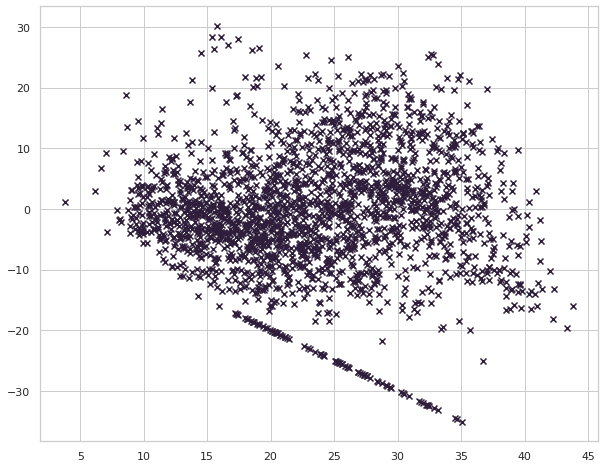

In [69]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),marker='x')

# **Implementing Elastic Net Regression**

In [70]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [71]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [72]:
#checking score
elnet.score(X_train, y_train)

0.6152557713637432

In [73]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [74]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 59.247024931621645
RMSE : 7.69720890528649
MAE : 5.891715220293744
R2 : 0.6152557713637432
Adjusted R2 : 0.6068136711088861


In [75]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [76]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 61.65141449800951
RMSE : 7.851841471782878
MAE : 6.0107752888670705
R2 : 0.6097181856869531
Adjusted R2 : 0.601154579117059


In [77]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

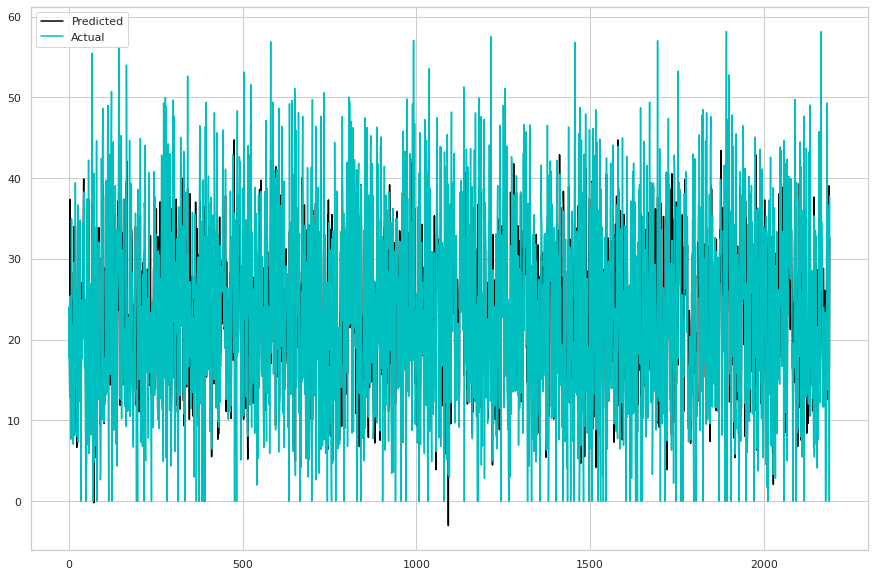

In [78]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

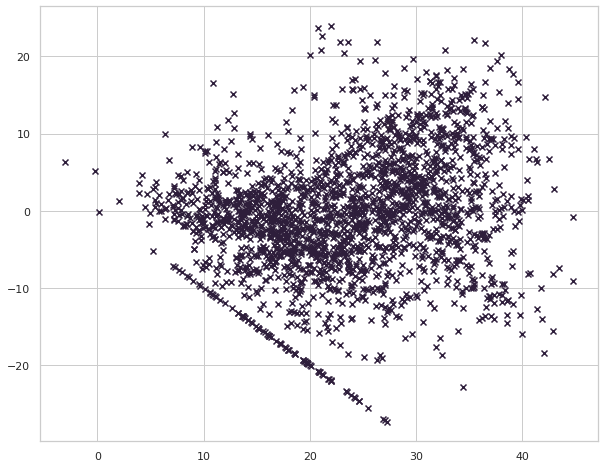

In [79]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [80]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [81]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [82]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [83]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 70.83956335953023
RMSE : 8.41662422587169
MAE : 6.212810403143256
R2 : 0.5399749912650054
Adjusted R2 : 0.5298810718389808


In [84]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [85]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 86.43392534094095
RMSE : 9.296984744579339
MAE : 6.896746286990921
R2 : 0.452833491738458
Adjusted R2 : 0.44082750392879766


In [86]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

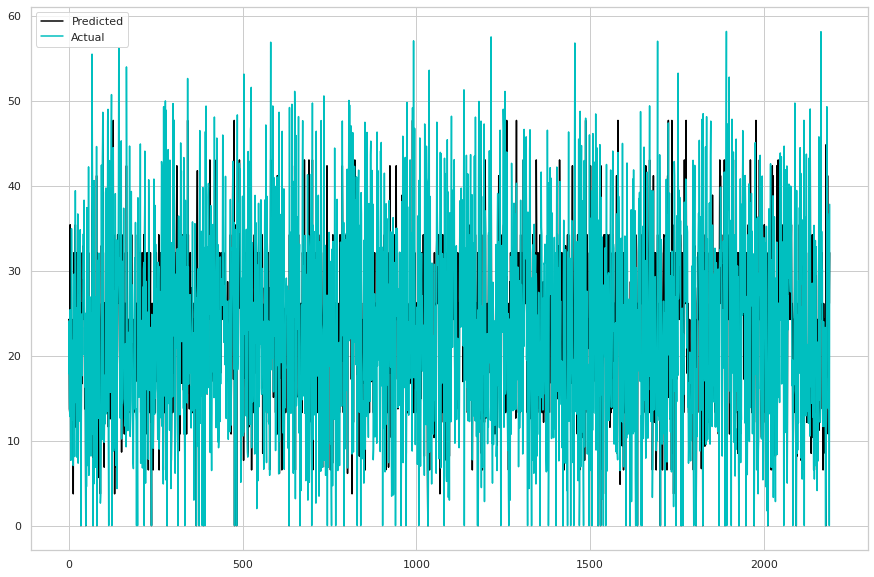

In [87]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

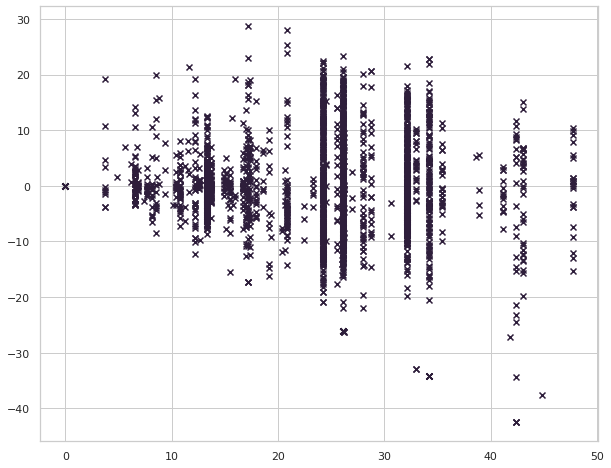

In [88]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

# **Implementng Random Forest Regression** 

In [89]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [90]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [92]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.0957955394128938
RMSE : 1.4476862710590626
MAE : 0.9540697211359372
R2 : 0.9863901142863909
Adjusted R2 : 0.986091484674561


In [93]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [94]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.837922643713972
RMSE : 3.979688762166455
MAE : 2.5788426333210106
R2 : 0.8997386639922439
Adjusted R2 : 0.897538718711028


In [95]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [96]:
# Feature importances
rf_model.feature_importances_

array([3.16817500e-01, 1.63151501e-01, 1.40600096e-02, 1.44809848e-02,
       3.29480846e-02, 3.26638730e-02, 1.26073804e-03, 4.37462409e-03,
       1.28560195e-02, 2.06160728e-02, 2.90494028e-02, 2.48291662e-02,
       8.25532464e-03, 3.70581612e-03, 1.29954682e-02, 9.16543467e-04,
       2.43366383e-03, 1.01697605e-03, 2.02268402e-04, 2.01087644e-04,
       3.47386634e-04, 1.32336887e-03, 3.53896362e-03, 1.05310248e-02,
       3.11245291e-02, 1.75431304e-02, 1.21111360e-02, 1.27706338e-02,
       1.00814640e-02, 4.01735105e-03, 5.71458171e-03, 1.37795368e-03,
       9.44632938e-03, 2.99541723e-03, 1.51617263e-01, 1.00532190e-03,
       2.91721531e-03, 1.43732498e-03, 1.81170996e-03, 1.46049323e-03,
       1.26856015e-03, 1.81239574e-03, 1.70572927e-03, 1.93853538e-03,
       3.46517527e-03, 7.07944725e-04, 9.09393555e-03])

In [97]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [98]:
plt.style.use('dark_background')

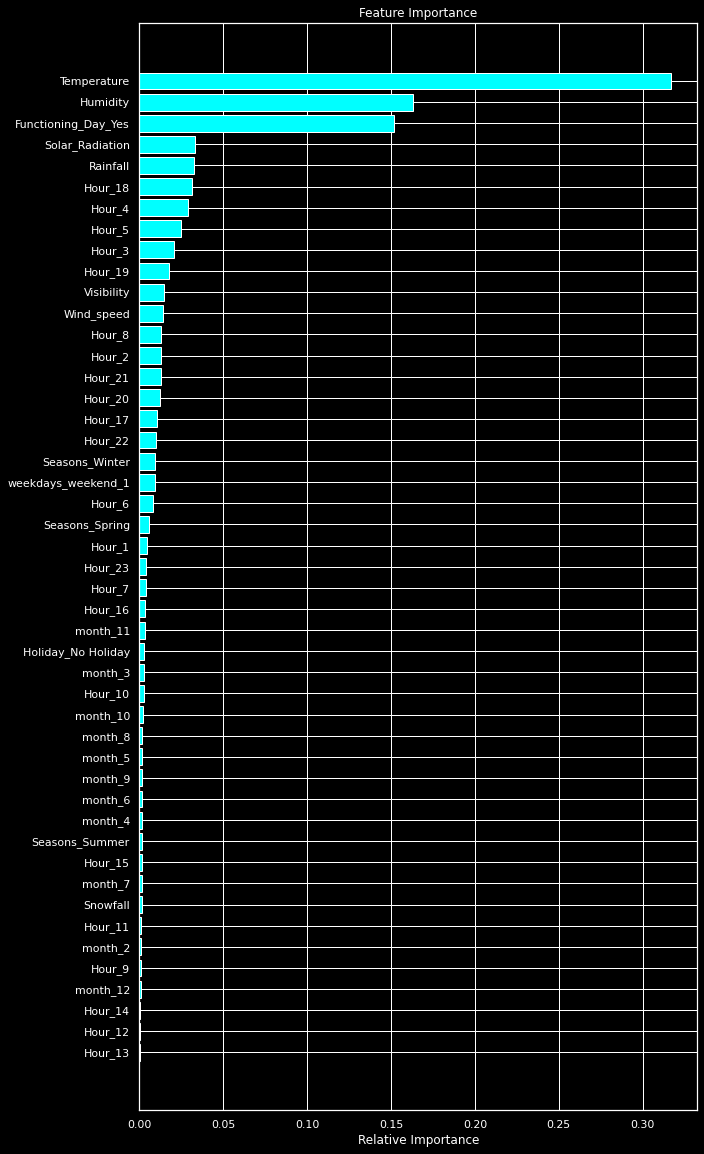

In [99]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Implementing XG Boost Regression**

In [100]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=False) 
X = df1.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [101]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [102]:
#Fitting the model
xgb_r.fit(X_train, y_train)

[15:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [103]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [104]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 21.073184205244345
RMSE : 4.590553801584766
MAE : 3.4604088000898527
R2 : 0.8631528585390765
Adjusted R2 : 0.8601501434836781


### R2 score value is 0.86 it means that our model is able to capture most of the data variance.

In [105]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [106]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 23.708875814619123
RMSE : 4.869176091970707
MAE : 3.6695411336005646
R2 : 0.8499119096683334
Adjusted R2 : 0.8466186602539598


In [107]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [108]:
# Feature importances
xgb_r.feature_importances_

array([6.8816982e-02, 4.4810779e-02, 2.3555274e-03, 2.5329739e-03,
       4.1063119e-02, 5.5038329e-02, 0.0000000e+00, 6.4617880e-03,
       2.3201618e-02, 3.6660902e-02, 4.7320101e-02, 3.9830729e-02,
       2.1765575e-02, 0.0000000e+00, 1.9511521e-02, 0.0000000e+00,
       1.3451007e-02, 9.3416190e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.7891222e-03, 2.1720586e-02,
       5.4531179e-02, 4.8402470e-02, 3.2616664e-02, 4.7736190e-02,
       4.3025091e-02, 5.7156137e-03, 3.6076470e-03, 3.3062031e-03,
       7.1470596e-02, 7.8896089e-03, 1.7300019e-01, 0.0000000e+00,
       5.1428024e-03, 2.7018555e-03, 0.0000000e+00, 7.1089650e-03,
       6.1454356e-04, 0.0000000e+00, 1.4060320e-04, 1.3129831e-02,
       1.1029454e-02, 1.8275700e-03, 9.3307337e-03], dtype=float32)

In [109]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

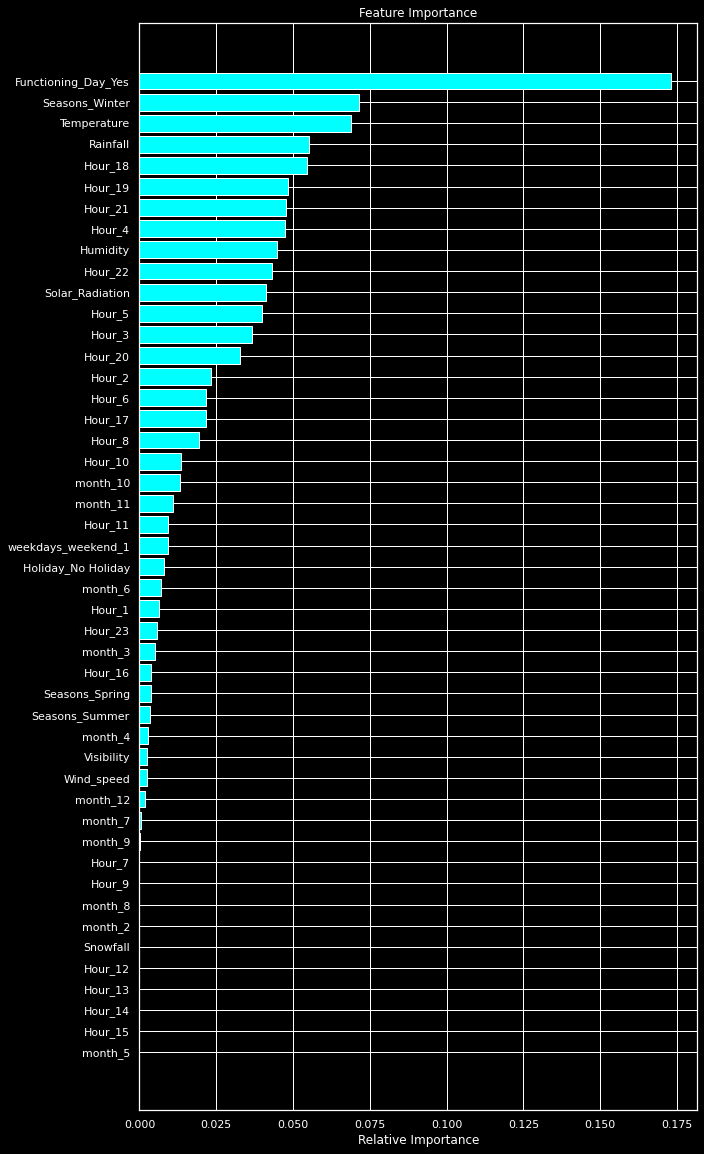

In [110]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**
## ***For improvement of our model let's do some Hyper parameter tuning.***

## **XG boost Regressor with GridSearchCV**

In [111]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [112]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [113]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[15:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[15:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[15:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[15:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[15:55:06] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [114]:
xg_grid.best_estimator_


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [115]:
xg_optimal_model = xg_grid.best_estimator_

In [116]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [117]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 4.059746697992111
RMSE : 2.0148813111426964
MAE : 1.377916686777391
R2 : 0.9736364127383567
Adjusted R2 : 0.9730579400019901


In [118]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [119]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 13.980201717845725
RMSE : 3.7390107940263726
MAE : 2.5267025048184246
R2 : 0.9114988920314332
Adjusted R2 : 0.9095569909695645


In [120]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [121]:
xg_optimal_model.feature_importances_

array([0.02025816, 0.0174529 , 0.00126562, 0.00145027, 0.00661327,
       0.03226612, 0.00181978, 0.004811  , 0.04044073, 0.04802452,
       0.05630353, 0.05240968, 0.02179706, 0.006768  , 0.02456177,
       0.00290274, 0.01054254, 0.0090678 , 0.00190597, 0.00179658,
       0.00117202, 0.00228033, 0.00532703, 0.03668127, 0.06595007,
       0.04854019, 0.05957427, 0.04715436, 0.04674775, 0.01496609,
       0.0083527 , 0.00265786, 0.05144427, 0.00313029, 0.2094047 ,
       0.001649  , 0.0019836 , 0.0021212 , 0.00295584, 0.00600426,
       0.00126908, 0.00265012, 0.00212533, 0.00450596, 0.00384445,
       0.0007825 , 0.00426742], dtype=float32)

In [122]:
xg_optimal_model.fit(X_train,y_train)

[15:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [123]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

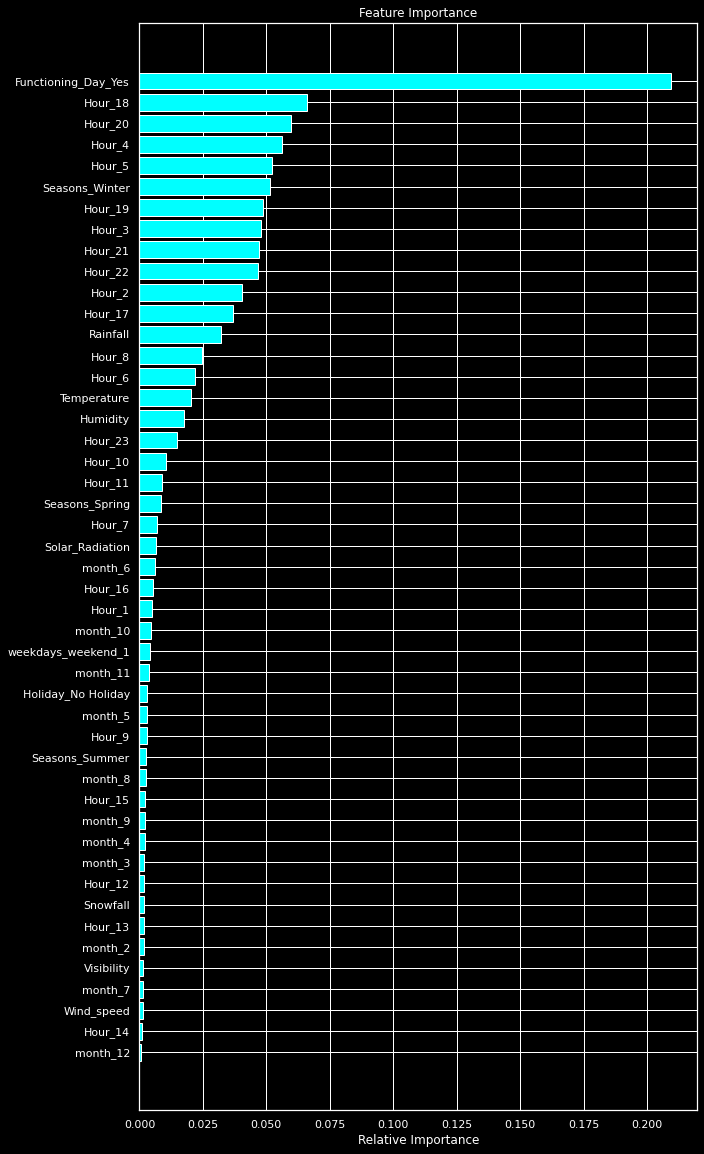

In [124]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**CONCLUSION**

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation:** 

In [125]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   4.658  37.606  6.132  0.756   
             1            Ridge regression  4.658  37.606  6.132  0.756   
             2            Lasso regression  7.255  91.594  9.570  0.405   
             3       Elasticnet regression  5.892  59.247  7.697  0.615   
             4    Decision tree regression  6.213  70.840  8.417  0.540   
             5    Random forest regression  0.954   2.096  1.448  0.986   
             6         XG Boost Regression  3.460  21.073  4.591  0.863   
             7  XG boost regg GridserachCV  1.378   4.060  2.015  0.974   
Test set     0          Linear regression   4.658  36.645  6.053  0.768   
             1            Ridge regression  4.659  36.647  6.054  0.768   
             2            Lasso regression  7.456  96.775  9.837  0.387   
             3       Elasticnet regression  6.011  61.651  7.852  0.610   
             4    Decision tree regression  6.897  86.434  9.297  0.453   
             5    Random forest regression  2.579  15.838  3.980  0.900   
             6         XG Boost Regression  3.670  23.709  4.869  0.850   
             7  XG boost regg GridserachCV  2.527  13.980  3.739  0.911   

                Adj_R2  
Training set 0    0.75  
             1    0.75  
             2    0.39  
             3    0.61  
             4    0.53  
             5    0.99  
             6    0.86  
             7    0.97  
Test set     0    0.76  
             1    0.76  
             2    0.37  
             3    0.60  
             4    0.44  
             5    0.90  
             6    0.85  
             7    0.91

# **Final Observations:**


*    **Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.**

*   **No overfitting is seen.**
*  **We can deploy XG Boost Gridsearch CV model.**
